# Chapter 5 (Part 1)
First, a general overview of chapter 5. We will be looking into statevectors, product states, and entanglement. I've decided to split chapter 5 since I think it would be a bit over the top to cover Product States, Entanglement, Control Gates, Superdense Coding, and The Hardy Paradox. So today, we will only be looking at the first half!

### Product States
As we've seen before, we can combine 2 separate single qubit states into 1 state vector using the tensor product of the 2 single qubit states. This will return a state vector of 2^n different states, where n is the number of individual qubits that are being combined into this state vector. 

![image](https://learn.qiskit.org/content/v2/intro/images/multi-qubit/tensor.svg)

As seen above, we can combine the quantum states $|+\rangle$ and $|0\rangle$ for a statevector of $|+0\rangle$. We can think of this combination of both states as every possible combination of their possible states. In other words, I have a penny that can be heads or tails, and then I have a quarter that can be heads or tails. I can combine their states so that the penny and quarter respectively can be tails-tails, tails-heads, heads-tails, or heads-heads. 

Intuitively, we already understand this basic math and the same thing applies to quantum states, but with their amplitudes rather than probabilities. Let's use this example of probabilities like I mentioned before. For instance, if we multiply a probability of 50% with another 50%, we get 25% which is the probability of both of these occuring. With our penny and quarter example, we can flip both coins and it would have a 25% chance of both being heads after flipping both coins. Following this intuition, we know that we can multiply the probabilities of each coin to get this result. We multiply the 50% chance of getting heads on the penny with the 50% chance of getting heads on the quarter. 
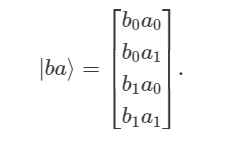

If we have states $|b\rangle$ and $|a\rangle$ and combine them similar to the above $|+0\rangle$, we get $|ba\rangle$. Following the intuition we talked about previously, we multiply each possible state of $b$ with the other possible states of $a$. This is going to give us our state vector of the combined quantum states!

### Entangled States
Now I want you to take a look at the below state and try your best to derive the possible individual states $|a\rangle$ and $|b\rangle$ that would give you this product state. ***(hint: it's impossible)***

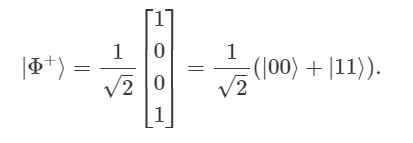

If you refused to take the hint, you would be searching forever for the answer that does not exist. The only way to achieve a state like this is through entanglement. In laymen's terms, this means having one outcome be dependent on the other. In the example above we can see this dependence through the first and second digit always matching eachother. Imagine you have that penny and quarter, but you can entangle them so that whenever the penny is flipped, the quarter will always flip to that same value! That is what this state vector is communicating.  

### The Actual Entanglement
Now let's try to actually recreate this state in qiskit.

In [21]:
import qiskit
from qiskit.visualization import plot_bloch_multivector 
import numpy as np
import pylatexenc 
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2,2)
ket = Statevector(qc)
ket.draw()

'Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],\n            dims=(2, 2))'

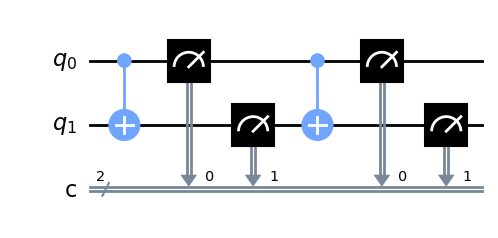

In [23]:
qc.cx(0,1)
qc.measure([0,1], [0,1])
display(qc.draw('mpl'))

{'00': 1024}


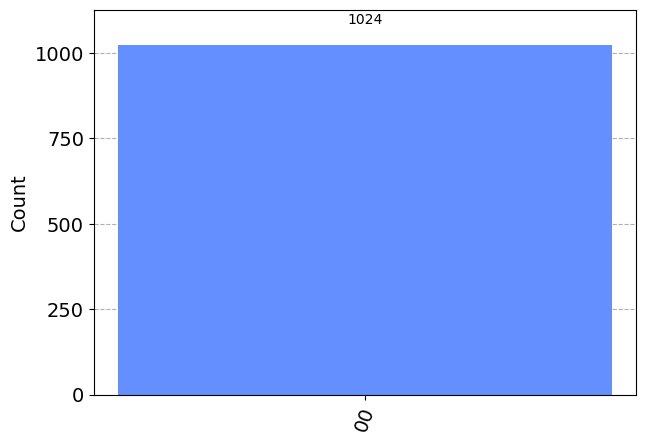

In [24]:
# simulate outputs
sim = AerSimulator()
compiled = transpile(qc, sim)
job = assemble(compiled)

result = sim.run(compiled).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

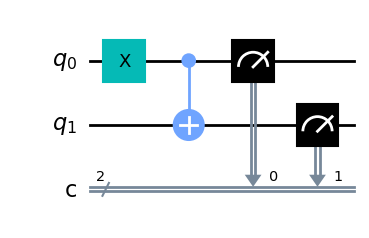

In [26]:
qc.data = []
qc.x(0)
qc.cx(0,1)
qc.measure([0,1], [0,1])
display(qc.draw('mpl'))

{'11': 1024}


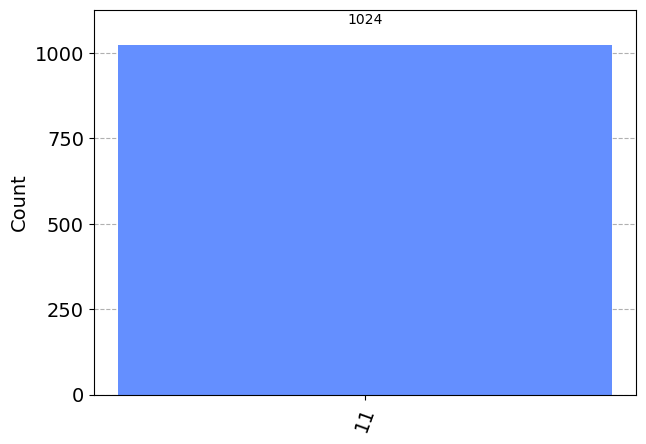

In [27]:
# simulate outputs
sim = AerSimulator()
compiled = transpile(qc, sim)
job = assemble(compiled)

result = sim.run(compiled).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

Looks like we got exactly what we expected from our previous understanding of CNOT gates and we are getting extremely close to our desired state! The states are always matching one another, but we have yet to introduce a superposition, let's add some Hadamard gates to achieve this.

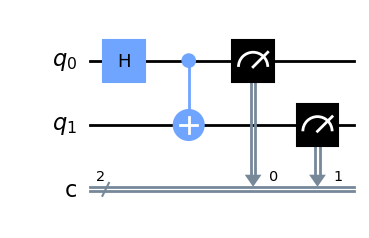

{'00': 529, '11': 495}


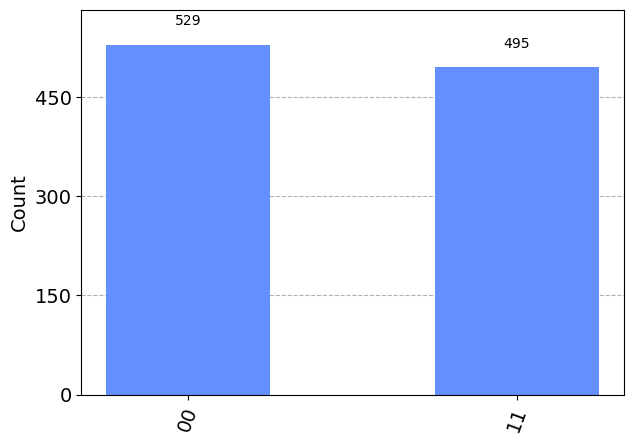

In [29]:
qc.data = []
qc.h(0)
qc.cx(0,1)
qc.measure([0,1], [0,1])
display(qc.draw('mpl'))

# simulate outputs
sim = AerSimulator()
compiled = transpile(qc, sim)
job = assemble(compiled)

result = sim.run(compiled).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

Look at that, looks like we achieved our goal state of entanglement with only a Hadamard and CNOT gate. Also keep in mind Quantum Phase Kickback which is a topic we covered in a previous lecture. The influence of the CNOT gate is not a one way street as it seems. The target qubit will kick back it's phase it the control qubit. This creates a form of a two way street of communication between the entangled qubits. This feature within our quantum circuits is one of the absolutely fundamental properties of our quantum algorithms which we will explore later on. 

### Learning More
I highly recommend you play with these state vectors in the Qiskit Composer. It will improve your intuition for these states and allow you to see a more analytical, and less visual, represenation of these states. This was very important for my own personal improvement, and I'm sure it will help with yours as well.

You can find the state vector section of the IBM Quantum Composer by switching from the Q-Sphere graph, to the Statevector Graph. This will open a chart, a phase chart, and a state vector below it. Toy around with this and see what states you can create. Good luck! 